<a href="https://colab.research.google.com/github/Susanna-Salata/goit-DS/blob/main/GoIT_DS_HomeWork_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

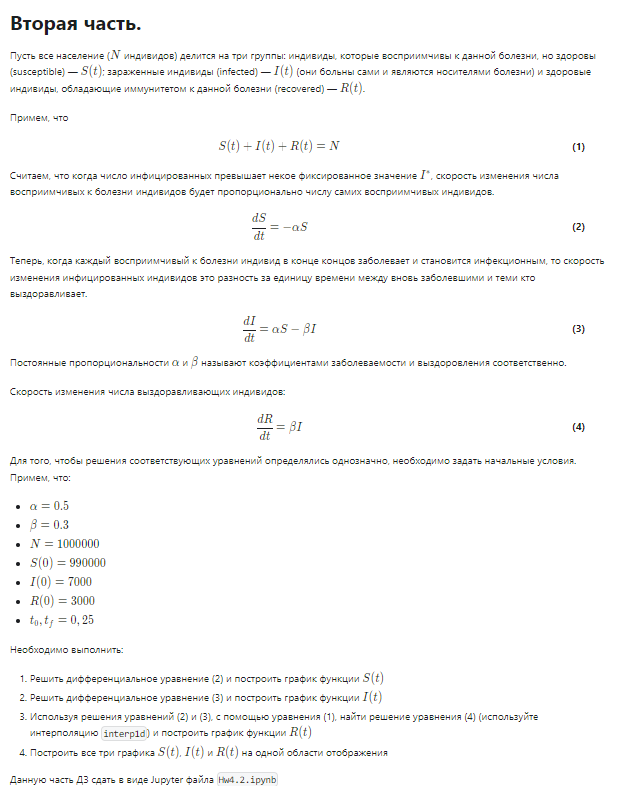

In [1]:
import scipy as sp
import numpy as np
import seaborn as sns
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.integrate._ivp.radau import solve_collocation_system

alpha = 0.5
beta = 0.3
N = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25


def dydt_S(t, S):
    return -alpha * S

def dydt_I(t, S):
    return alpha * soln_S.sol(t) - beta * S

def dydt_R(t, S):
    return beta * soln_I.sol(t)


In [3]:
soln_S = solve_ivp(dydt_S, (t0, tf), [S0], dense_output=True)
print(soln_S)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff22d3918d0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


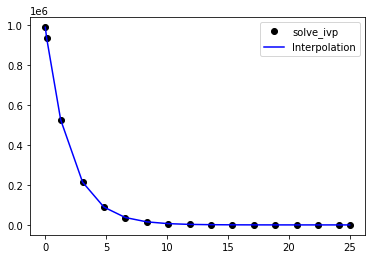

In [7]:
t, y = soln_S.t, soln_S.y[0]
z, = soln_S.sol(t)
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.plot(t, z, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [8]:
soln_I = solve_ivp(dydt_I, (t0, tf), [I0], dense_output=True)
print(soln_I)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff22d253b10>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None


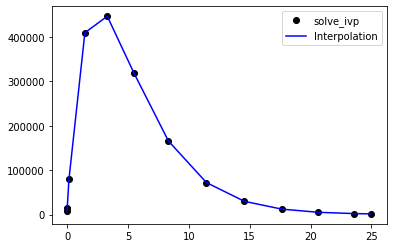

In [9]:
t, y = soln_I.t, soln_I.y[0]
z1, = soln_I.sol(t)
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.plot(t, z1, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [10]:
soln_R = solve_ivp(dydt_R, (t0, tf), [R0], dense_output=True)
print(soln_R)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7ff22cd54a90>
   status: 0
  success: True
        t: array([ 0.        ,  0.04591408,  0.50505489,  2.52164655,  6.39171416,
       13.00278397, 25.        ])
 t_events: None
        y: array([[  3000.        ,   3250.38212192,  20560.81517778,
        256054.30962666, 695967.3329268 , 952044.06617891,
        998733.23270223]])
 y_events: None


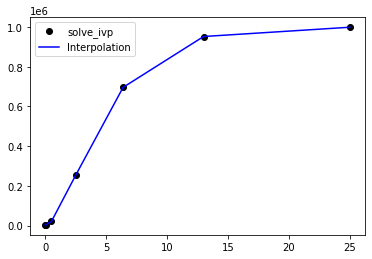

In [11]:
t, y = soln_R.t, soln_R.y[0]
z, = soln_R.sol(t)
plt.plot(t, y, 'o', color='k', label='solve_ivp')
plt.plot(t, z, color='blue', label='Interpolation')
plt.legend()
plt.show()